In [78]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot as plt
from sklearn.utils.multiclass import unique_labels


In [79]:
# df = pd.read_csv('FinalDataset/All.csv', low_memory=False)
df = pd.read_csv('FinalDataset/All_BestFirst.csv', low_memory=False)
df.shape

(36694, 9)

In [80]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [81]:
df.dtypes

domain_token_count               int64
executable                       int64
NumberofDotsinURL                int64
Arguments_LongestWordLength      int64
NumberRate_Domain              float64
NumberRate_FileName            float64
NumberRate_AfterPath           float64
Entropy_Domain                 float64
class                           object
dtype: object

In [82]:
df.head(5)

,domain_token_count,executable,NumberofDotsinURL,Arguments_LongestWordLength,NumberRate_Domain,NumberRate_FileName,NumberRate_AfterPath,Entropy_Domain,class
0,19,0,18,-1,0.041,0.656,-1.0,0.612,phishing
1,15,0,15,-1,0.083,0.000,-1.0,0.633,phishing
2,15,0,15,-1,0.083,0.000,-1.0,0.633,phishing
3,14,0,13,-1,0.038,-1.000,-1.0,0.659,phishing
4,13,0,13,-1,0.232,0.000,-1.0,0.705,phishing


In [83]:
df.tail(5)

,domain_token_count,executable,NumberofDotsinURL,Arguments_LongestWordLength,NumberRate_Domain,NumberRate_FileName,NumberRate_AfterPath,Entropy_Domain,class
36689,2,0,1,-1,0.0,-1.0,-1.0,0.714,phishing
36690,2,0,1,-1,0.0,-1.0,-1.0,0.699,benign
36691,2,0,1,-1,0.0,-1.0,-1.0,0.699,benign
36692,2,0,1,-1,0.0,-1.0,-1.0,0.699,benign
36693,2,0,1,-1,0.0,-1.0,-1.0,0.699,benign


In [84]:
df.describe()

,domain_token_count,executable,NumberofDotsinURL,Arguments_LongestWordLength,NumberRate_Domain,NumberRate_FileName,NumberRate_AfterPath,Entropy_Domain
count,36694.000000,36694.000000,36694.000000,36694.000000,36694.000000,36694.000000,36694.000000,36694.000000
mean,2.856898,0.001390,2.865864,2.071837,0.037260,0.103400,-0.475008,0.842504
std,0.905287,0.037256,1.518083,5.362271,0.104115,0.333635,0.600210,0.066271
min,2.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.562000
25%,2.000000,0.000000,2.000000,-1.000000,0.000000,0.000000,-1.000000,0.795000
50%,3.000000,0.000000,3.000000,-1.000000,0.000000,0.070000,-1.000000,0.836000
75%,3.000000,0.000000,3.000000,4.000000,0.000000,0.214000,0.104000,0.885000
max,19.000000,1.000000,20.000000,91.000000,0.733000,1.000000,1.000000,1.000000


In [85]:
print(df.groupby('class').size())

class
Defacement    7930
benign        7780
malware       6711
phishing      7575
spam          6698
dtype: int64


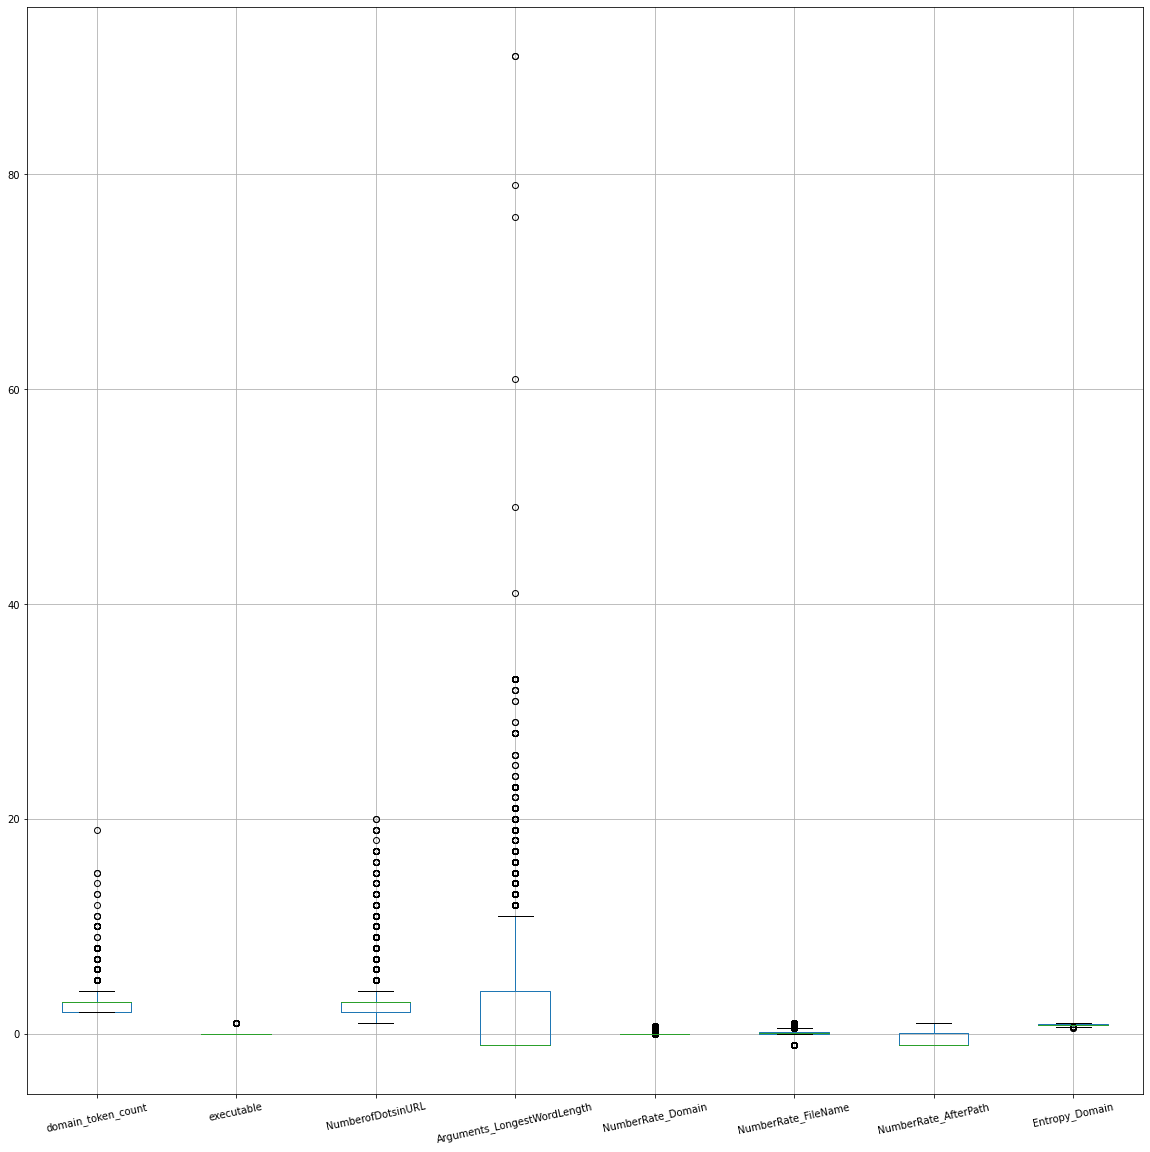

In [86]:
# unvariate plots
ax = df.boxplot(figsize=(20,20))
ax.tick_params(axis ='x', rotation = 12)

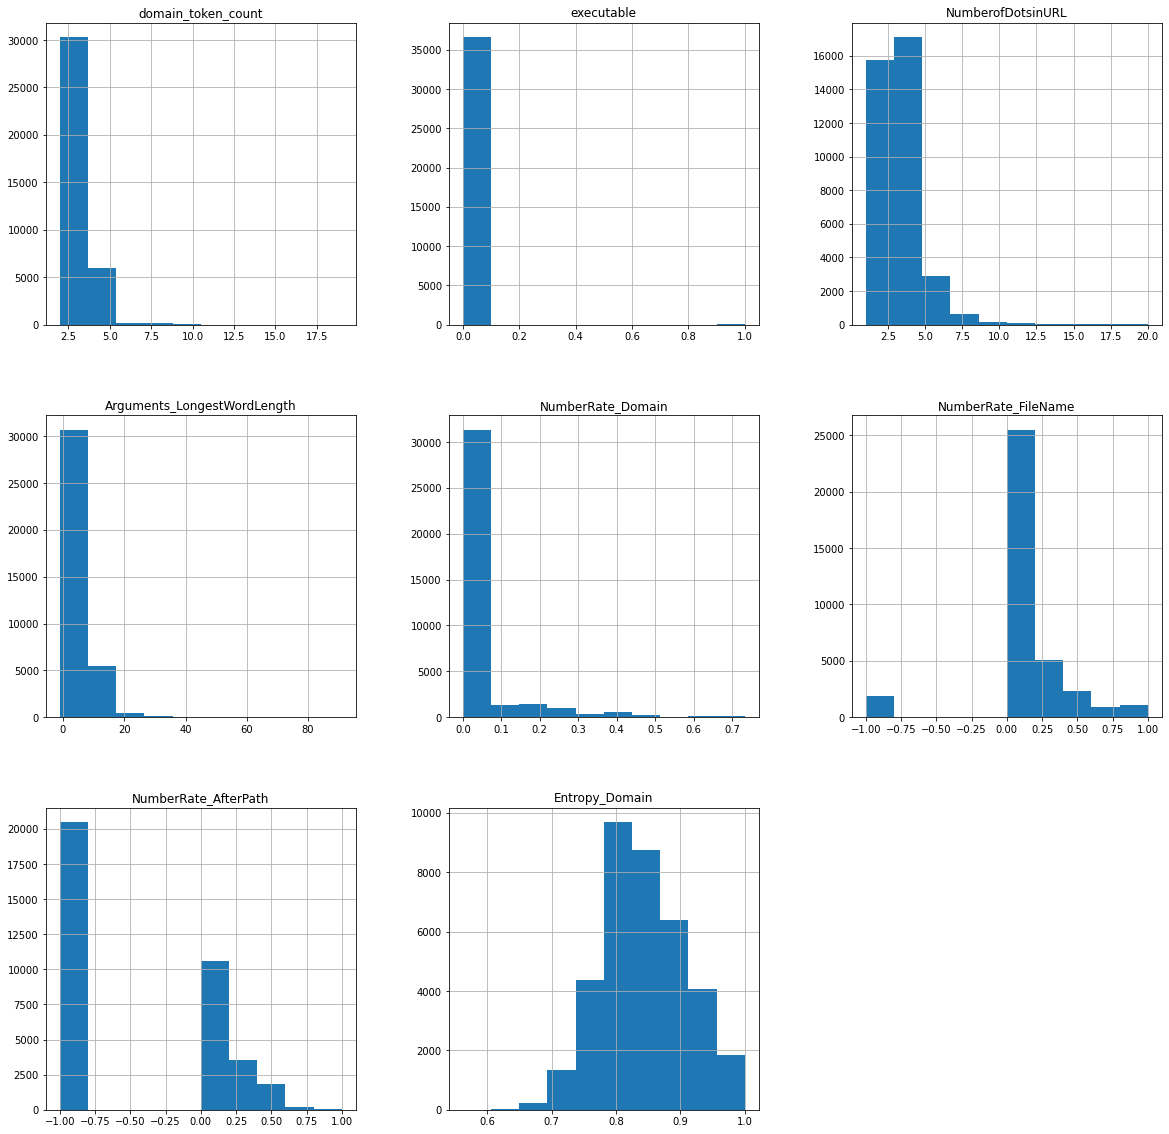

In [100]:
# Histograms of each attribute
df.hist(figsize=(20, 20))
plt.show()

c:\Users\cleme\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\cleme\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\cleme\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

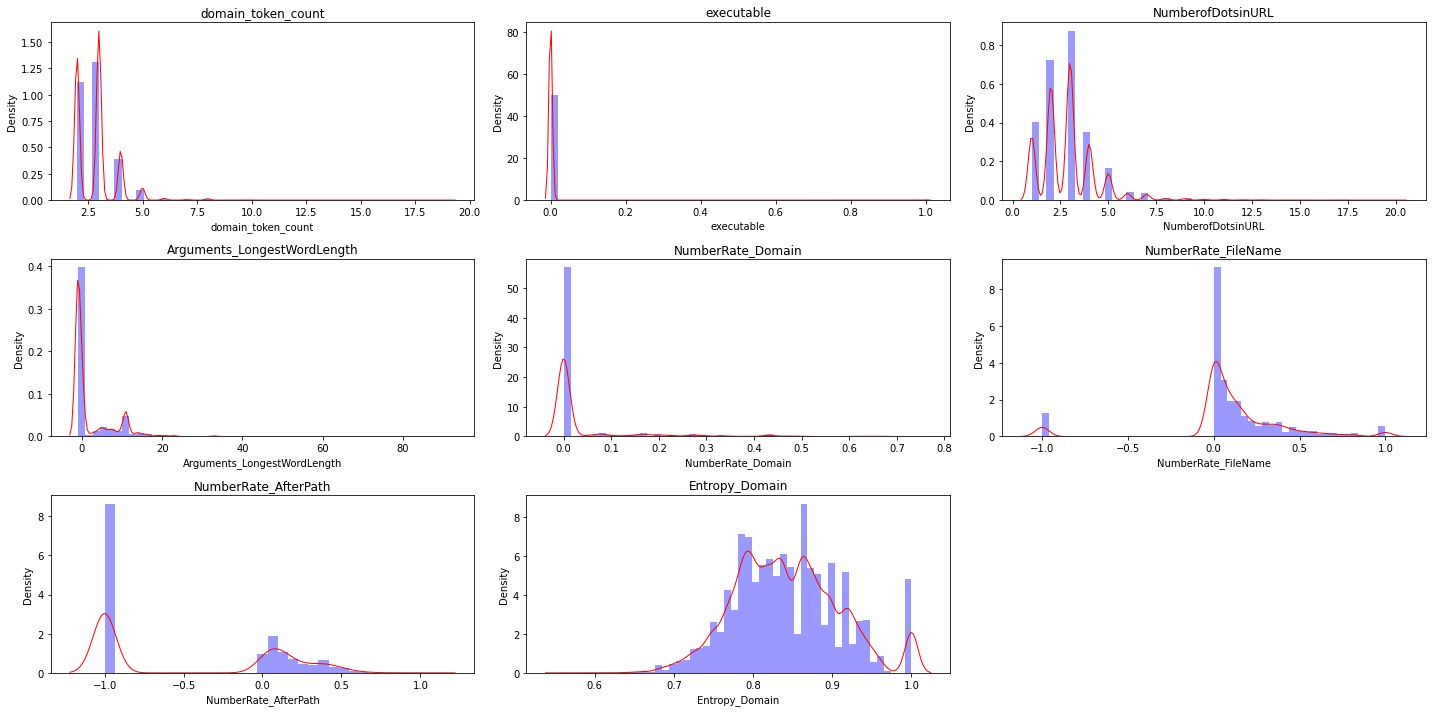

In [102]:
import seaborn as sns

plt.figure(figsize=(20,10))
for i in range(len(df.columns)-1):
  plt.subplot(3, 3, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "r", "lw": 1, "label": "KDE"}, hist_kws={"color": "b"})          # distplot ==> displot or histplot
  plt.title(df.columns[i])

plt.tight_layout()

In [89]:
# Split-out validation dataset
def splitDataset(df):
    array = df.values
    X = array[:,0:8]
    Y = array[:,8]
    validation_size = 0.20
    random_seed = 100
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                    test_size=validation_size, 
                                                                                    random_state=random_seed)
    return X_train, X_validation, Y_train, Y_validation

In [90]:
def runExperiments(X_train, Y_train):
    random_seed = 100
    scoring = 'accuracy'
    models = []
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('NB', GaussianNB()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier(n_estimators=10)))

    # evaluate each model in turn using 10-fold cross-validation
    results = []
    classifiers = []
    accuracies = []
    for classifier, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=None)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        accuracies.append((cv_results.mean(), classifier))
        results.append(cv_results)
        classifiers.append(classifier)
        msg = "%s: %f (%f)" % (classifier, cv_results.mean(), cv_results.std())
        print(msg)
    return results, accuracies, classifiers

In [91]:
X_train, X_validation, Y_train, Y_validation = splitDataset(df)
results, accuracies, classifiers = runExperiments(X_train, Y_train)

LDA: 0.554011 (0.012295)
NB: 0.455527 (0.009043)
DT: 0.927270 (0.002550)
RF: 0.929620 (0.004043)


RF 0.93
DT 0.93
LDA 0.55
NB 0.46


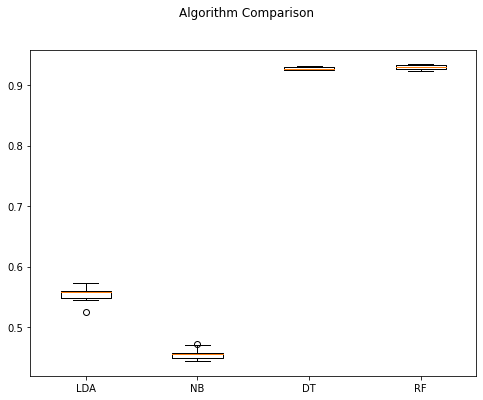

In [92]:
def compareModels(accuracies, results, classifiers):
    # sort the mean accuracy results in descending order and print
    accuracies.sort(reverse=True)
    for acc, cls in accuracies:
        print("{} {:.2f}".format(cls, acc))
    # Compare Algorithms using box-plot
    fig = plt.figure(figsize=(8, 6))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(classifiers)
    plt.show()
compareModels(accuracies, results, classifiers)

In [93]:
def testBestModel(model, X_validation, Y_validation):
    # make predictions on validation dataset
    Y_predictions = rf.predict(X_validation)
    print("Accuracy = {:.2f}".format(accuracy_score(Y_validation, Y_predictions)))
    print('Confusion Matrix:')
    print(confusion_matrix(Y_validation, Y_predictions))
    print('Classification Report:')
    print(classification_report(Y_validation, Y_predictions))
    return Y_predictions

In [94]:
# train the best model and find the validation accuracy
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, Y_train)
Y_predictions = testBestModel(rf, X_validation, Y_validation)

Accuracy = 0.93
Confusion Matrix:
[[1494   12    4   74   13]
 [  28 1454   25   38    1]
 [  16   14 1245   62    3]
 [  56   69   54 1317   23]
 [   8    5    4   17 1303]]
Classification Report:
              precision    recall  f1-score   support

  Defacement       0.93      0.94      0.93      1597
      benign       0.94      0.94      0.94      1546
     malware       0.93      0.93      0.93      1340
    phishing       0.87      0.87      0.87      1519
        spam       0.97      0.97      0.97      1337

    accuracy                           0.93      7339
   macro avg       0.93      0.93      0.93      7339
weighted avg       0.93      0.93      0.93      7339



In [95]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        #print('Confusion matrix, without normalization')
        pass

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [96]:
label = 'class'
lblTypes = set(df[label])
for lbl in lblTypes:
    print('| {} | {} |'.format(lbl, len(df[df[label] == lbl].index)))

| Defacement | 7930 |
| phishing | 7575 |
| spam | 6698 |
| benign | 7780 |
| malware | 6711 |


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

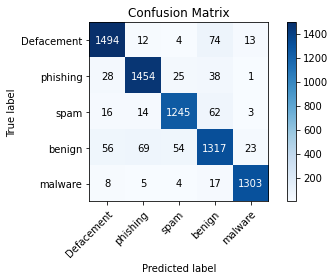

In [97]:
classes = lblTypes
np.set_printoptions(precision=2)
# plot non-normalized confusion matrix
plot_confusion_matrix(Y_validation, Y_predictions, classes=classes, 
                       title='Confusion Matrix')

In [98]:
correlations = df.corr()

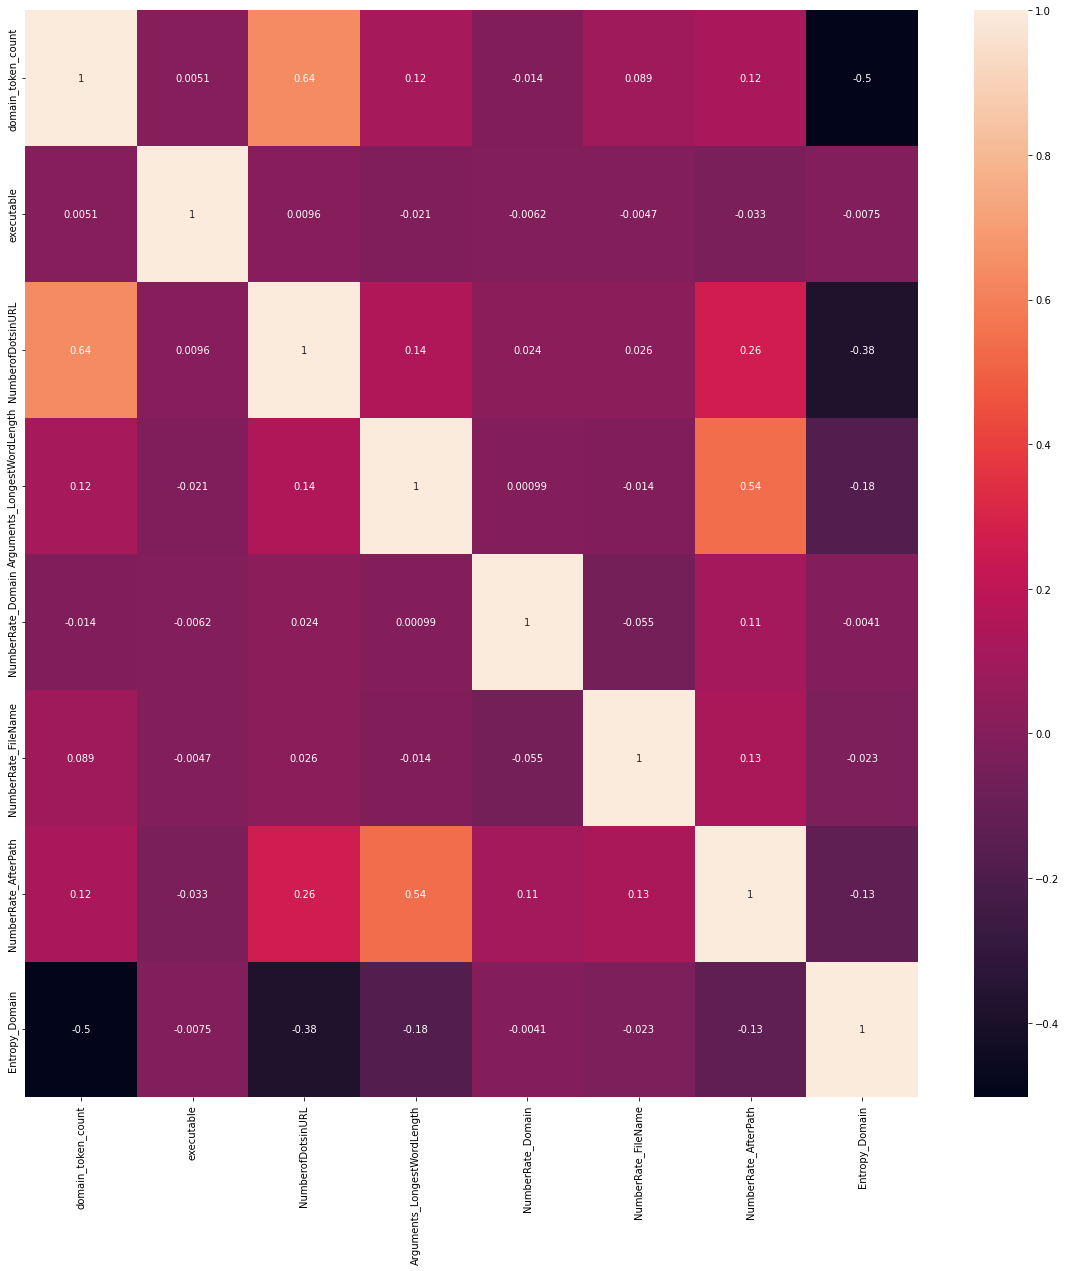

In [99]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
plt.show()